# MultiClass Classification

   Segundo a descrição provida pela página do [sklearn](http://scikit-learn.org/stable/modules/multiclass.html): 
   
**Multiclass Classification** significa uma tarefa de classificação com mais de duas classes. Ex: uma série de imagens de frutas podem ser laranjas, maçãs ou pêras. **Multiclass Classification** assume que cada amostra pode ser classificada como uma, e apenas uma, categoria. 


Um ***dataset*** comum para esse tipo de problema é o 
**[iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)**

[Explicação de Andrew Ng para o MultiClass Classification](https://www.youtube.com/watch?v=ZvaELFv5IpM)

In [37]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [74]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [39]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Agora definimos nossos dados. 

Como de costume definimos `X` e `Y`.

`X` = Nosso `DataFrame` com as `features`

`Y` = Nosso Array com o `Target`, o que queremos classificar

In [40]:
X = pd.DataFrame(iris.data,columns=iris.feature_names)

Y = pd.DataFrame(iris.target,columns=['Species'])

In [41]:
X.columns = ['sepal len','sepal wid','petal len','petal wid']
X.head()

,sepal len,sepal wid,petal len,petal wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## Aqui construí um método para transformar os valores numéricos da coluna Species em nomes

In [43]:
def name_flower(document):
    if document == 0:
        response = 'setosa'
    elif document == 2:
        response = 'versicolor'
    else:
        response = 'virginica'
    return response

### Use o método [.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) para aplicar a função na coluna

In [44]:
Y['Species'] = Y['Species'].map(name_flower)
Y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Juntar X e Y

In [45]:
iris = pd.concat([X,Y],axis=1)

In [47]:
iris.head()

,sepal len,sepal wid,petal len,petal wid,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Vamos visualizar esse DataFrame


* Ferramenta muito interessante do Seaborn. [PairPlot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

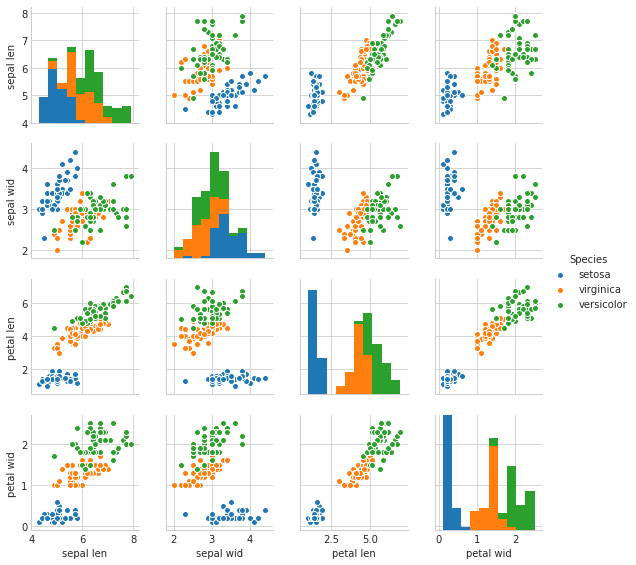

In [58]:
sns.pairplot(data=iris,hue='Species',size=2)

Essa visualização nos mostra que a Setosa, de cor azul nos gráficos, é naturalmente bem separada. O maior desafio será identificar as outras duas flores!

## Vamos continuar com os gráficos e ver mais características

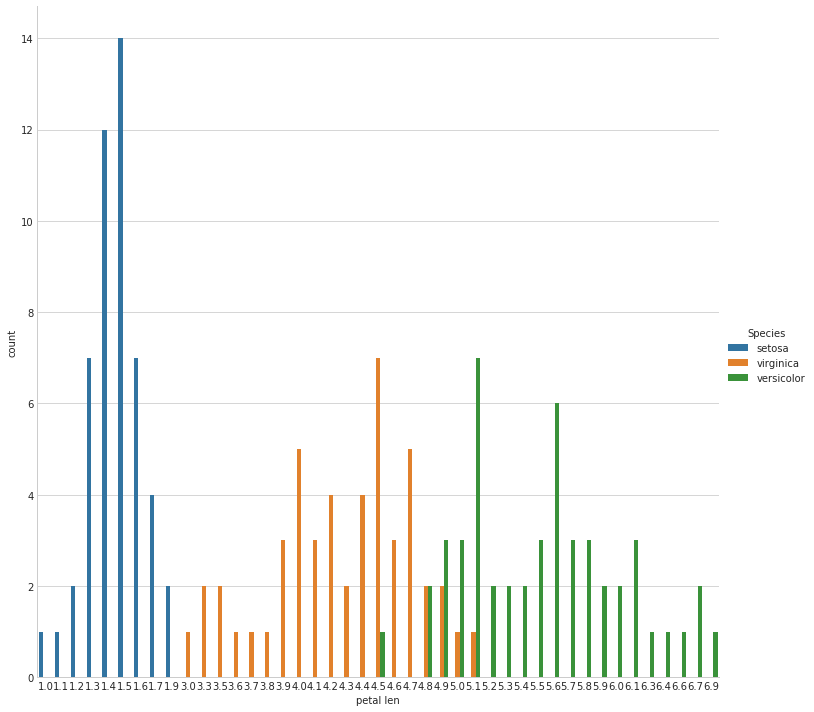

In [66]:
sns.factorplot(x='petal len',data=iris,hue='Species',kind='count',size=10)

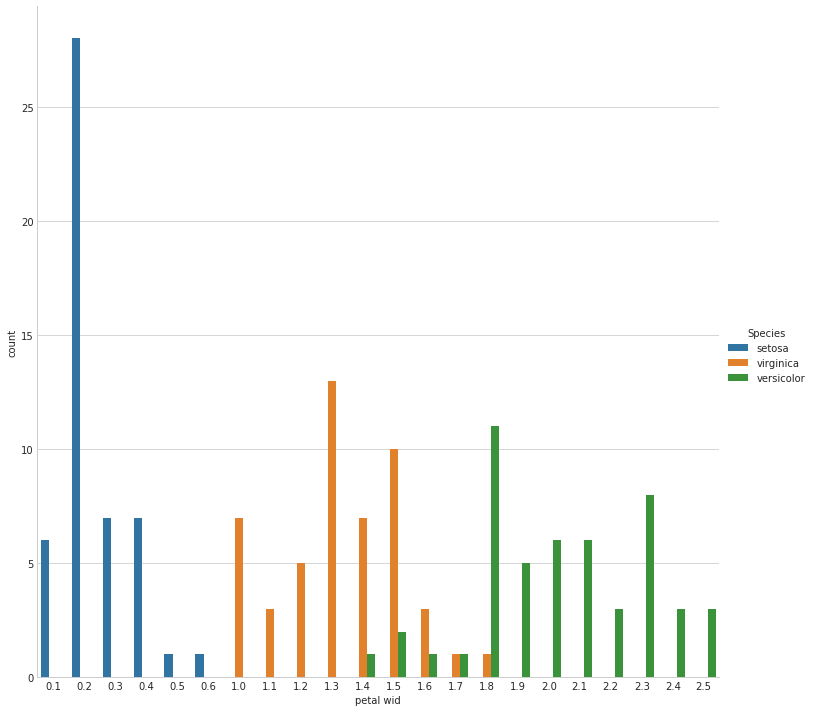

In [68]:
sns.factorplot(x='petal wid',data=iris,hue='Species',kind='count',size=10)

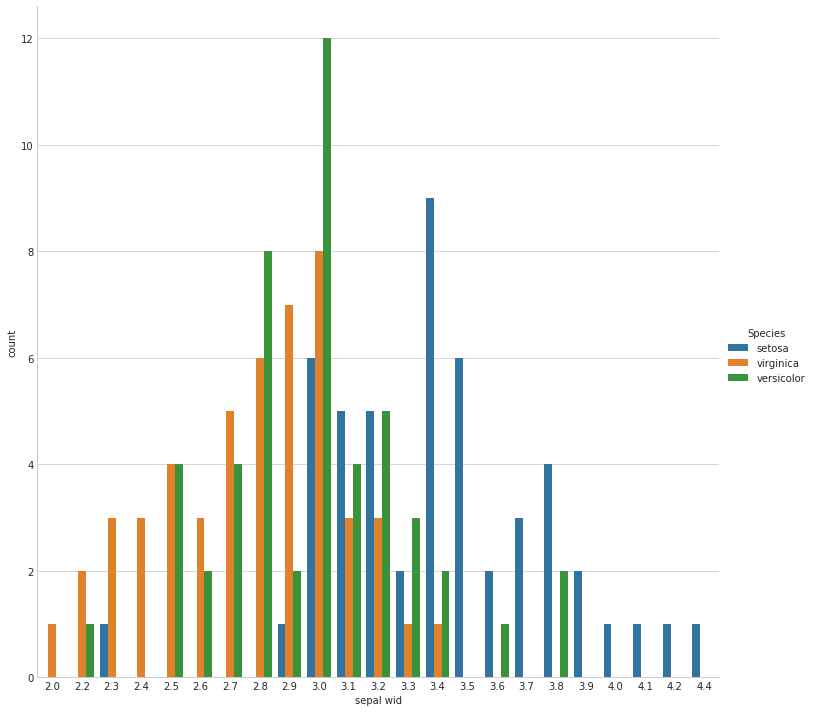

In [70]:
sns.factorplot(x='sepal wid',data=iris,hue='Species',kind='count',size=10)

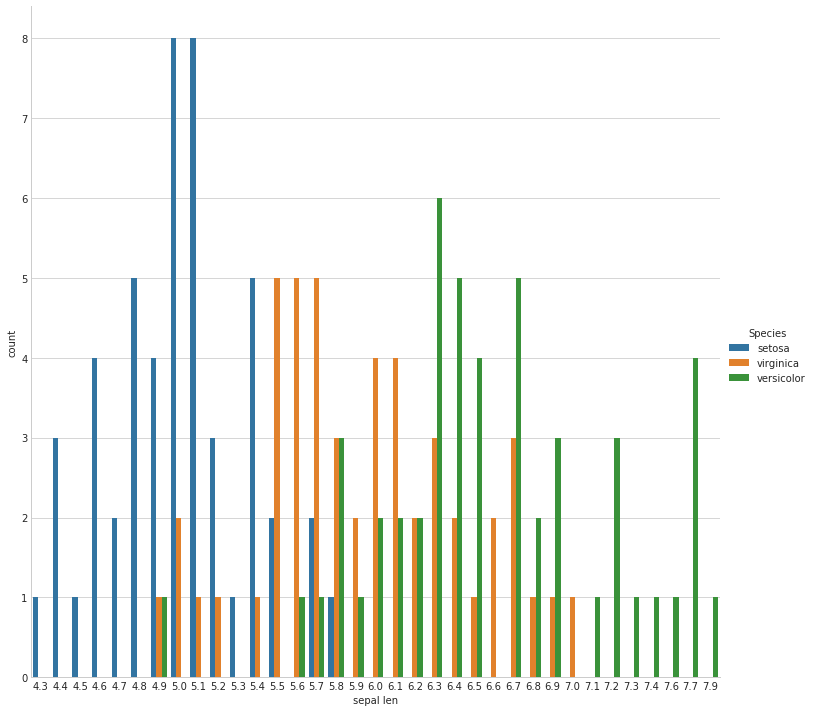

In [72]:
sns.factorplot(x='sepal len',data=iris,hue='Species',kind='count',size=10)

# Vamos utilizar o Sklearn para classificar as flores!

In [75]:
log_model = LogisticRegression()

In [126]:
np.ravel(Y['Species'])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virg

### Divida os dados em Train e Test

### Observação
Para `Y`, `target`, devemos utilizar uma array de uma dimensão ou uma coluna do `DataFrame`. Como eu transformei o `Y` em um `DataFrame` no inicio deste notebook, precisei passar apenas a coluna com os valores que quero classificar para o metodo `.fit`

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X,np.ravel(Y['Species']),test_size=0.3,random_state=3)

In [128]:
X_train.shape

(105, 4)

In [129]:
log_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Metrics from SkLearn: 

**[Metrics](http://scikit-learn.org/stable/modules/classes.html)**

In [130]:
from sklearn import metrics

In [131]:
Y_predicts = log_model.predict(X_test)

## Suspeito

Dar 100% de accuracy é suspeito

In [133]:
print(metrics.accuracy_score(Y_test,Y_predicts))

1.0


# K-nearest Neighbors

[Sklearn K-nearest Neighbors Tutorial](http://scikit-learn.org/stable/modules/neighbors.html)

[Kneighbors Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [134]:
from sklearn.neighbors import KNeighborsClassifier

## Utilizar o KNN se assemelha a utilizar as regressões que já aprendemos

In [157]:
knn = KNeighborsClassifier(n_neighbors=3)

In [158]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [159]:
knn_pred = knn.predict(X_test)

In [160]:
print(metrics.accuracy_score(Y_test,knn_pred))

0.955555555556
